In [3]:
import os

# Changes the notebook working directory on level up.
%cd ..

# Running main python script.
%run -i "src/main.py"

# Data set from main.py
data_set

/Users/Anne/Documents/UIS/DAT540/Project_Netflix/Project/dat540-netflix_catalogue


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Unknown director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,Unknown director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,Unknown director,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,Unknown date_added,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,Unknown director,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,Unknown date_added,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,Unknown director,Unknown cast,Unknown country,Unknown date_added,2016,Unknown rating,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,Unknown director,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,Unknown date_added,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [63]:
import datetime as dt
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
from wordcloud import WordCloud

In [458]:
genres_movies = data_set[data_set["type"]=="Movie"]['listed_in'].dropna().str.split(', ').explode()

Text(0.5, 0, 'Total Count')

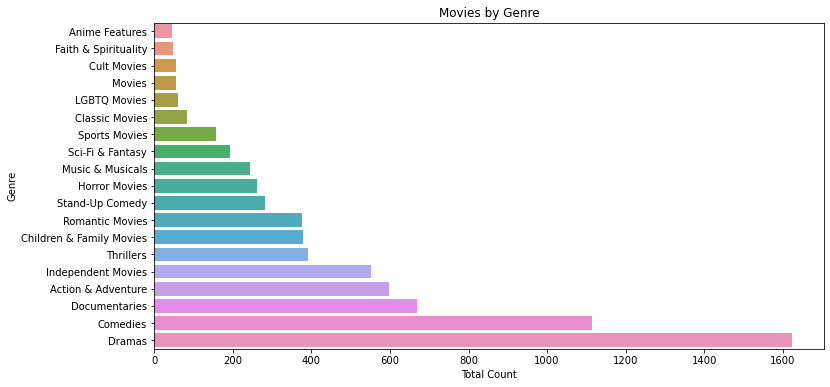

In [459]:
plt.figure(figsize=(12,6))
sns.countplot(y=genres_movies, order=genres_movies.value_counts(ascending=True).index[:-1]) #removed international movies
plt.title("Movies by Genre")
plt.ylabel("Genre")
plt.xlabel("Total Count")

In [460]:
genres_tv = data_set[data_set["type"]=="TV Show"]['listed_in'].dropna().str.split(', ').explode()

Text(0.5, 0, 'Total Count')

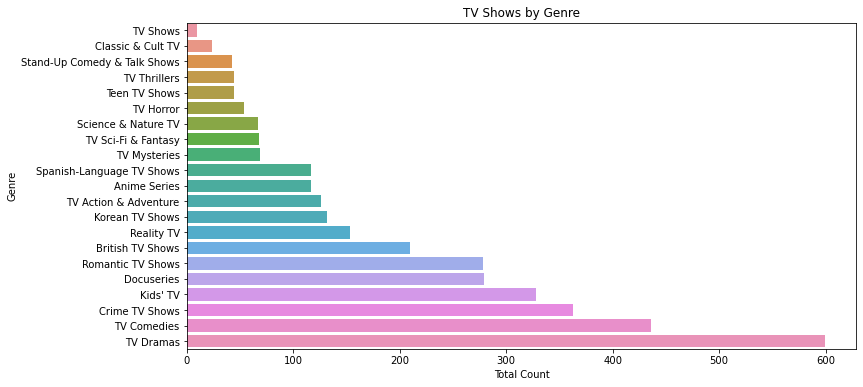

In [461]:
plt.figure(figsize=(12,6))
sns.countplot(y=genres_tv, order=genres_tv.value_counts(ascending=True).index[:-1]) # Removed international TV shows
plt.title("TV Shows by Genre")
plt.ylabel("Genre")
plt.xlabel("Total Count")

International movies and international tv shows always coupled with other genres and therefore not added to plots above

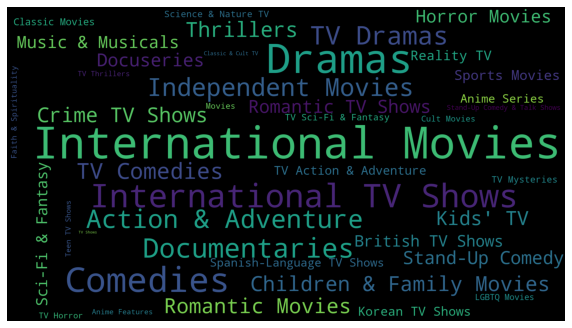

In [61]:
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(
                          background_color='Black',
                          width=1920,
                          height=1080
                         ).generate_from_frequencies(genres.value_counts())
plt.imshow(wordcloud)#, interpolation="bilinear")
plt.axis('off')
plt.show()

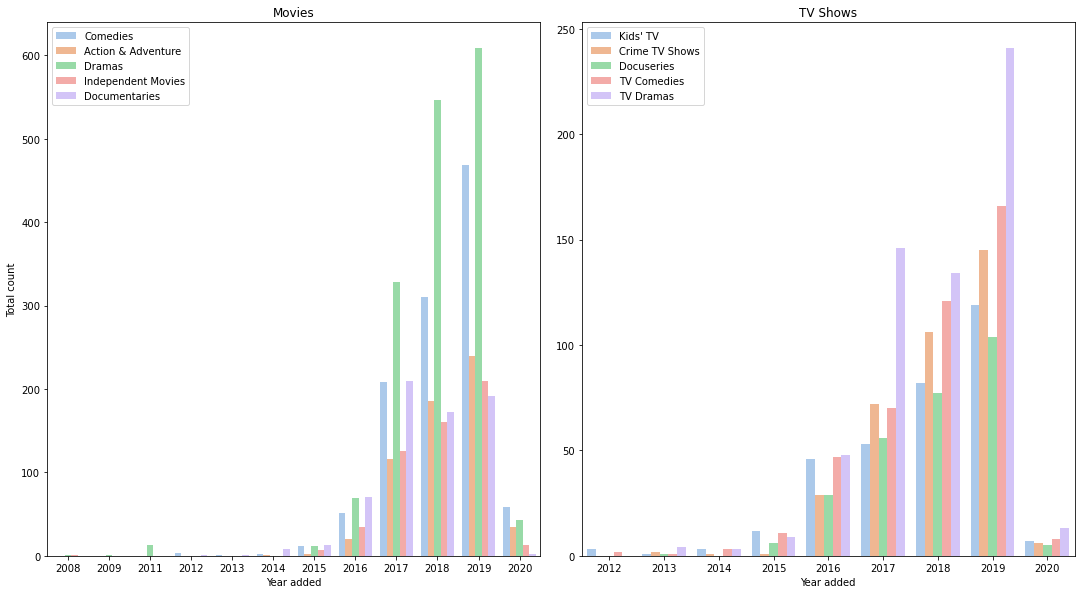

In [475]:
genre_time = data_set[['date_added','listed_in']]
genre_time = genre_time[genre_time['date_added'] != 'Unknown date_added']
genre_time['month_added'] = genre_time['date_added'].str.replace(',', '').str.lstrip().apply(lambda x: dt.datetime.strptime(x,'%B %d %Y')).dt.month_name()
genre_time['year_added'] = genre_time['date_added'].str.replace(',', '').str.lstrip().apply(lambda x: dt.datetime.strptime(x,'%B %d %Y')).dt.year
#year_released = genre_time['date_added']
genre_time['listed_in'] = genre_time['listed_in'].str.split(', ')
genre_time = genre_time.explode('listed_in')
#print(genre_time)

filter_list_m = ['Dramas', 'Comedies', 'Documentaries', 'Action & Adventure', 'Independent Movies']
filter_list_tv = ["TV Dramas", "TV Comedies", "Crime TV Shows", "Kids' TV", "Docuseries"]
top_m_genres = genre_time[genre_time.listed_in.isin(filter_list_m)]
top_tv_genres = genre_time[genre_time.listed_in.isin(filter_list_tv)]


fig, axes = plt.subplots(1, 2, figsize=(15, 8))
#fig.suptitle("Movies TV Shows added to Netflix by Year for top 5 genres")
fig.tight_layout()

sns.countplot(ax=axes[0], x="year_added", hue="listed_in" ,data=top_m_genres, palette="pastel")
axes[0].set_title("Movies")
axes[0].set_xlabel("Year added")
axes[0].set_ylabel("Total count")
axes[0].legend(loc=2)

sns.countplot(ax=axes[1], x="year_added", hue="listed_in" ,data=top_tv_genres, palette="pastel")
axes[1].set_title("TV Shows")
axes[1].set_xlabel("Year added")
axes[1].set_ylabel("")
axes[1].legend(loc=2)



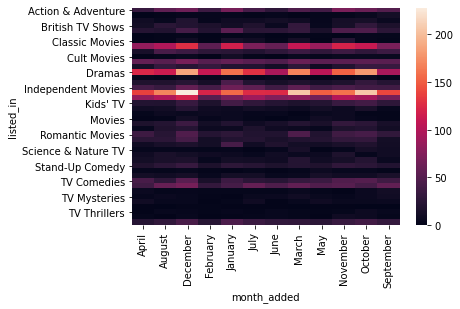

In [491]:
#plt.figure(figsize=(12,6))
#movie_genre_time = genre_time[genre_time["type"]=="TV Show"]
month_genre = genre_time[["month_added", "listed_in"]]#.groupby('month_added')
#months = month_genre['month_added'].unique()
#print(months)
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
group = month_genre.groupby("listed_in")
group = group['month_added'].value_counts() #count values in month
group = group.unstack() 
group = group.fillna(0) #fill nans with 0

sns.heatmap(group)

Text(0.5, 0, 'Year')

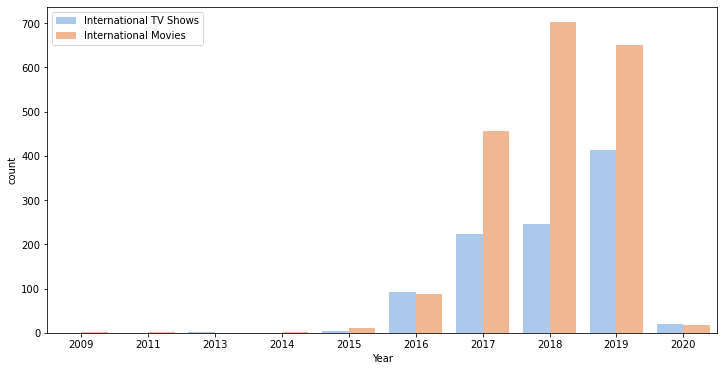

In [331]:
filter_list_int = ["International TV Shows", "International Movies"]
top_int = genre_time[genre_time.listed_in.isin(filter_list_int)]

plt.figure(figsize=(12,6))
sns.countplot(x="date_added", hue="listed_in" ,data=top_int, palette="pastel")
plt.legend(loc=2)
plt.xlabel("Year")

Text(0, 0.5, '')

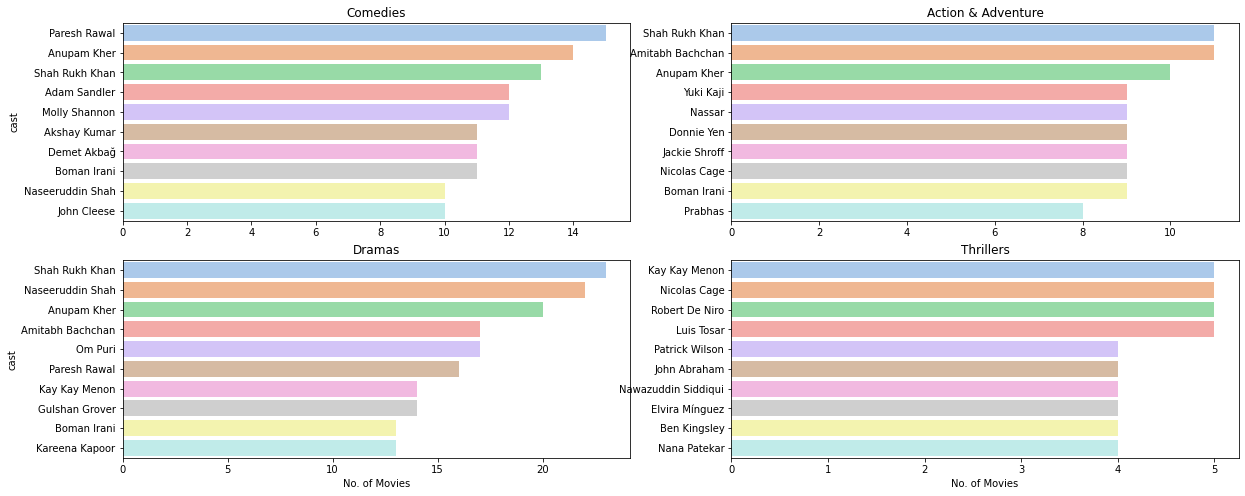

In [391]:
genre_cast = data_set[['cast','listed_in']]
genre_cast = genre_cast[genre_cast['cast'] != 'Unknown cast']
genre_cast['cast'] = genre_cast['cast'].str.split(',')
genre_cast = genre_cast.explode('cast')
genre_cast['cast'] = genre_cast['cast'].str.strip()

m_per_cast = genre_cast['cast'].value_counts()

genre_cast['listed_in'] = genre_cast['listed_in'].str.split(',')
genre_cast = genre_cast.explode('listed_in')
genre_cast['listed_in'] = genre_cast['listed_in'].str.lstrip()


top_comedy_cast = genre_cast[genre_cast['listed_in'] == 'Comedies']['cast']

top_action_cast = genre_cast[genre_cast['listed_in'] == 'Action & Adventure']['cast']

top_thriller_cast = genre_cast[genre_cast['listed_in'] == 'Thrillers']['cast']
top_drama_cast = genre_cast[genre_cast['listed_in'] == 'Dramas']['cast']

fig, axes = plt.subplots(2, 2, figsize=(20, 8))
#fig.suptitle("Movies TV Shows added to Netflix by Year for top 5 genres")
#fig.tight_layout()

sns.countplot(ax=axes[0,0], y=top_comedy_cast, palette="pastel", order=top_comedy_cast.value_counts(ascending=False).index[:10])
axes[0,0].set_title("Comedies")
axes[0,0].set_xlabel("")

sns.countplot(ax=axes[0,1], y=top_action_cast, palette="pastel", order=top_action_cast.value_counts(ascending=False).index[:10])
axes[0,1].set_title("Action & Adventure")
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("")

sns.countplot(ax=axes[1,0], y=top_drama_cast, palette="pastel", order=top_drama_cast.value_counts(ascending=False).index[:10])
axes[1,0].set_title("Dramas")
axes[1,0].set_xlabel("No. of Movies")

sns.countplot(ax=axes[1,1], y=top_thriller_cast, palette="pastel", order=top_thriller_cast.value_counts(ascending=False).index[:10])
axes[1,1].set_title("Thrillers")
axes[1,1].set_xlabel("No. of Movies")
axes[1,1].set_ylabel("")


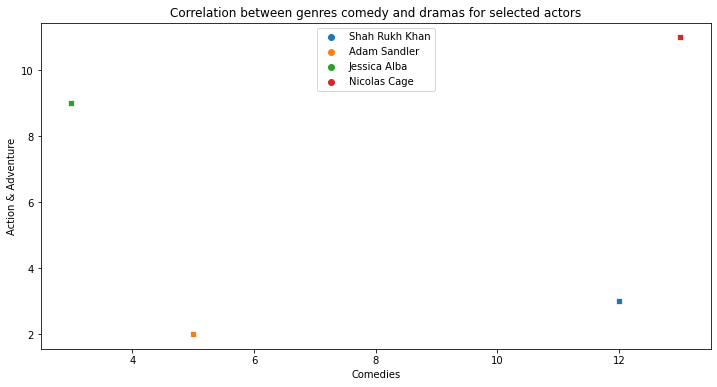

In [446]:
actors = ['Adam Sandler', 'Nicolas Cage', 'Shah Rukh Khan', 'Jessica Alba']
top_com = top_comedy_cast[top_comedy_cast.isin(actors)].value_counts()
top_drama = top_drama_cast[top_drama_cast.isin(actors)].value_counts()
top_action = top_action_cast[top_action_cast.isin(actors)].value_counts()

plt.figure(figsize=(12,6))
sns.scatterplot(x = top_com, y=top_action, marker='s', hue=top_com.index)
plt.xlabel("Comedies")
plt.ylabel("Action & Adventure")
plt.title("Correlation between genres comedy and dramas for selected actors")
plt.legend(loc=9)

Text(0, 0.5, '')

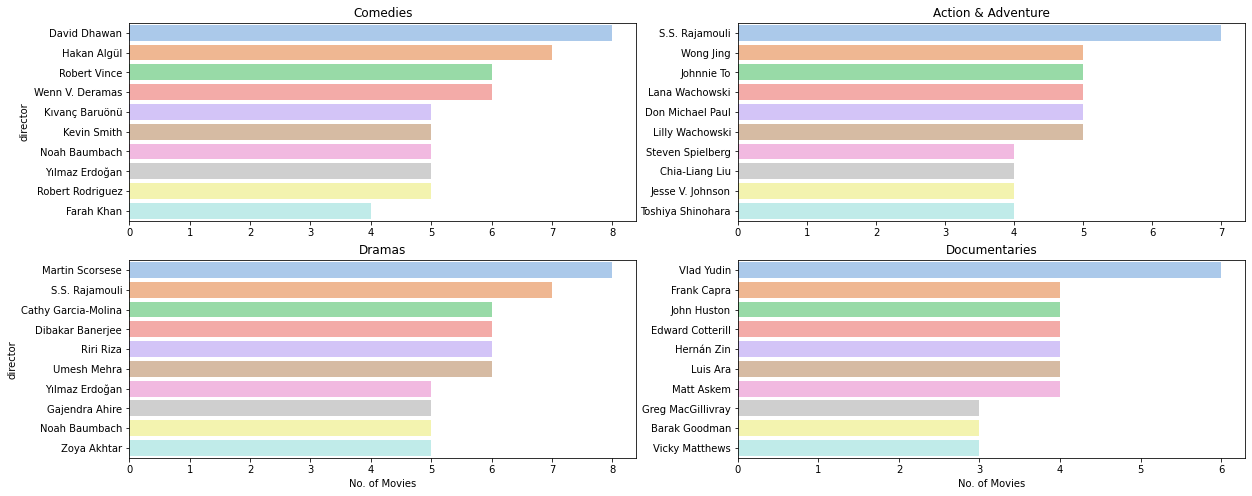

In [451]:
genre_director = data_set[['director','listed_in']]
genre_director = genre_director[genre_director['director'] != 'Unknown director']
genre_director['director'] = genre_director['director'].str.split(',')
genre_director = genre_director.explode('director')
genre_director['director'] = genre_director['director'].str.strip()

m_per_dir = genre_director['director'].value_counts()

genre_director['listed_in'] = genre_director['listed_in'].str.split(',')
genre_director = genre_director.explode('listed_in')
genre_director['listed_in'] = genre_director['listed_in'].str.lstrip()


top_comedy_dir = genre_director[genre_director['listed_in'] == 'Comedies']['director']

top_action_dir = genre_director[genre_director['listed_in'] == 'Action & Adventure']['director']

top_thriller_dir = genre_director[genre_director['listed_in'] == 'Thrillers']['director']
top_doc_dir = genre_director[genre_director['listed_in'] == 'Documentaries']['director']
top_drama_dir = genre_director[genre_director['listed_in'] == 'Dramas']['director']

fig, axes = plt.subplots(2, 2, figsize=(20, 8))
#fig.suptitle("Movies TV Shows added to Netflix by Year for top 5 genres")
#fig.tight_layout()

sns.countplot(ax=axes[0,0], y=top_comedy_dir, palette="pastel", order=top_comedy_dir.value_counts(ascending=False).index[:10])
axes[0,0].set_title("Comedies")
axes[0,0].set_xlabel("")

sns.countplot(ax=axes[0,1], y=top_action_dir, palette="pastel", order=top_action_dir.value_counts(ascending=False).index[:10])
axes[0,1].set_title("Action & Adventure")
axes[0,1].set_xlabel("")
axes[0,1].set_ylabel("")

sns.countplot(ax=axes[1,0], y=top_drama_dir, palette="pastel", order=top_drama_dir.value_counts(ascending=False).index[:10])
axes[1,0].set_title("Dramas")
axes[1,0].set_xlabel("No. of Movies")

sns.countplot(ax=axes[1,1], y=top_doc_dir, palette="pastel", order=top_doc_dir.value_counts(ascending=False).index[:10])
axes[1,1].set_title("Documentaries")
axes[1,1].set_xlabel("No. of Movies")
axes[1,1].set_ylabel("")